In [5]:
import numpy as np 
import pandas as pd 

In [6]:
data2 = pd.read_csv("/Users/dakosh/Downloads/en.openfoodfacts.org.products.csv", sep = '\t', nrows = 10)

In [7]:
data2.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'last_modified_by',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_en',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'ingredients_tags',
 'ingredients_analysis_tags',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutrition_data',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'nutriscore_score',
 'nutriscore_grade',
 'nova_group',
 'pnns

In [8]:
columns_final = ['code','generic_name','carbon-footprint-from-meat-or-fish_100g',  'carbon-footprint_100g', 'main_category',
 'main_category_en', 'owner', 'states','states_tags','states_en','brand_owner', 'ecoscore_score',
'ecoscore_grade', 'nova_group','pnns_groups_1','pnns_groups_2','food_groups',
 'food_groups_tags','food_groups_en',  'first_packaging_code_geo','cities','cities_tags','purchase_places',
 'stores', 'countries','countries_tags','countries_en',  'packaging','packaging_tags','packaging_en','packaging_text',
 'brands','brands_tags','categories','categories_tags','categories_en','origins','origins_tags','origins_en','manufacturing_places','manufacturing_places_tags',
'labels','labels_tags','labels_en','emb_codes', 'emb_codes_tags']

In [9]:
df = pd.read_csv('/Users/dakosh/Downloads/en.openfoodfacts.org.products.csv', sep = '\t', usecols=columns_final)

/var/folders/b_/mgwfywyx4dq0q3m_1rfy4rkh0000gn/T/ipykernel_81513/3533475586.py:1: DtypeWarning: Columns (0,15,21,22,23,24,25,29,30,31,33,65,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/dakosh/Downloads/en.openfoodfacts.org.products.csv', sep = '\t', usecols=columns_final)


In [10]:
df.shape

(2809009, 46)

In [11]:
df.columns.tolist()

['code',
 'generic_name',
 'packaging',
 'packaging_tags',
 'packaging_en',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'nova_group',
 'pnns_groups_1',
 'pnns_groups_2',
 'food_groups',
 'food_groups_tags',
 'food_groups_en',
 'states',
 'states_tags',
 'states_en',
 'brand_owner',
 'ecoscore_score',
 'ecoscore_grade',
 'owner',
 'main_category',
 'main_category_en',
 'carbon-footprint_100g',
 'carbon-footprint-from-meat-or-fish_100g']

In [25]:
percentage_missing_1 = df['carbon-footprint-from-meat-or-fish_100g'].isnull().mean() * 100
percentage_missing_1
percentage_missing_2 = df['carbon-footprint_100g'].isnull().mean() * 100
print(f'percentage of values missing for carbon footprint from meat or fish column: {percentage_missing_1}%')
print(f'percentage of values missing for carbon footprint_100g column: {percentage_missing_2}%')

percentage of values missing for carbon footprint from meat or fish column: 99.55016164063554%
percentage of values missing for carbon footprint_100g column: 99.98269852463983%


In [13]:
df_cleaned = df.dropna(subset=['carbon-footprint_100g' ], how='all') 

In [14]:
df_cleaned.shape

(486, 46)

In [15]:
df_cleaned['carbon-footprint_100g'].describe()

count     486.000000
mean      242.773595
std       433.978880
min         0.000000
25%         0.000000
50%       100.000000
75%       295.275000
max      5000.000000
Name: carbon-footprint_100g, dtype: float64

In [16]:
df_cleaned['carbon-footprint_100g'].head()

236546    500.0
433930    100.0
433935    100.0
433947    100.0
455039    100.0
Name: carbon-footprint_100g, dtype: float64

In [17]:
missing_ecoscore = df_cleaned['ecoscore_score'].isnull().mean() * 100 
missing_ecoscore

30.246913580246915

In [18]:
df_cleaned = df_cleaned.dropna(subset=['ecoscore_score' ], how='all') 
df_cleaned.shape

(339, 46)

In [19]:
df_cleaned = df_cleaned[(df_cleaned['ecoscore_score'] >= 0) & (df_cleaned['ecoscore_score'] <= 100)]
df_cleaned.shape

(282, 46)

In [20]:
correlation = df_cleaned['ecoscore_score'].corr(df_cleaned['carbon-footprint_100g'])

print(f'The correlation coefficient between variable1 and variable2 is: {correlation}')

The correlation coefficient between variable1 and variable2 is: -0.2445402389352179


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

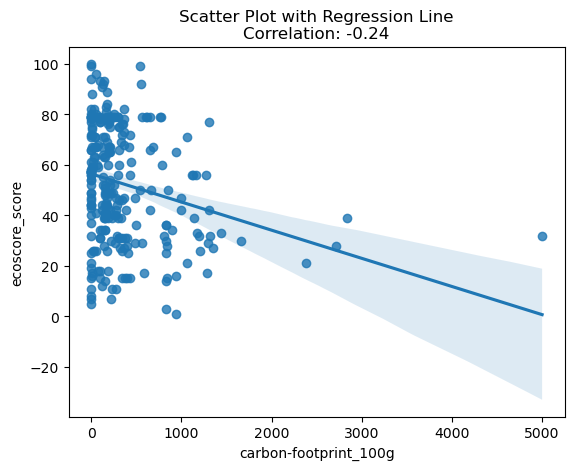

In [22]:
sns.regplot(x='carbon-footprint_100g', y='ecoscore_score', data=df_cleaned)

# Annotate the plot with the correlation coefficient
plt.title(f'Scatter Plot with Regression Line\nCorrelation: {correlation:.2f}')

# Show the plot
plt.show()